# This file is supposed to perform an EDA on the vehicles_us dataset that contains information on diferent vehicles in the US. This task is supposed to serve as a first step towards building a web app analizing this data

In [2]:
# I explain later why are this lines commented
# from google.colab import drive
# drive.mount('/content/drive')


# Libraries

In [3]:
import pandas as pd
from scipy.stats import mode
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Helpful Functions

## Dealing with NaN

In [4]:
def how_many_nan(df, show_nan=False):
    """ This function will show us how many NaN are in each column and either show all the NaN values """

    # First we are gonna show all the nan if requested, otherwise show the nan count for each column
    if show_nan:
        return df[df.isnull().any(axis=1)]

    for i in df.keys():
        print(f'{i}: {df.shape[0] - df[i].count()}')

    print('\n\n\n')




## Plotting Helpers

In [5]:
def plot_numeric_histograms(df, n_cols=None):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns

    # Calculate the number of columns in the grid
    if n_cols is None:
        n_cols = int(math.ceil(math.sqrt(len(numeric_columns))))

    # Calculate the number of rows in the grid
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    # Create a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten the 2D array of subplots
    axes = axes.flatten()

    # Plot histograms for each numeric column
    for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], bins=20, kde=False, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [6]:
def plot_categorical_bars(df, exclude_columns=None):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Exclude specified columns
    if exclude_columns:
        categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

    # Calculate the number of rows and columns in the grid
    n_cols = 3  # You can adjust the number of columns based on your preference
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

    # Create a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten the 2D array of subplots
    axes = axes.flatten()

    # Plot bar plots for each categorical column
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_title(f'Bar Plot of {column}')
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()


# Loading the Data

In [7]:
ds = pd.read_csv('../vehicles_us.csv')

# Comment below is only because im working on Google colab and is easier to access my data if its stored in drive
# ds=pd.read_csv('/content/drive/MyDrive/datasets/SoftwareDevelopmentToolsProject/vehicles_us.csv')

ds

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


# Taking a first look

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [9]:
ds.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Notice a few numbers that could lead to outliers but after a few strategies came to the conclusion that they are to few to make a difference

# Starting EDA

## Creating a copy of my dataframe since i dont wanna overwrite the original

In [10]:
df = ds.copy()

In the next few cells this copy doesnt come into action since im only looking at the dataframe. Later it will.

## Splitting the date column into month and year

In [11]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month


## Removing outliers

In [12]:
df = df[df['model_year'] > 1960]
df = df[df['price'] > 500]

In [13]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted
count,46817.000000,46817.000000,42026.000000,39654.000000,23055.0,46817,46817.000000,46817.000000,46817.000000
mean,12434.258752,2009.670782,6.105102,116734.971050,1.0,2018-10-25 03:51:36.490590976,39.592776,2018.307431,6.631117
min,534.000000,1961.000000,3.000000,0.000000,1.0,2018-05-01 00:00:00,0.000000,2018.000000,1.000000
25%,5495.000000,2006.000000,4.000000,72109.500000,1.0,2018-07-29 00:00:00,19.000000,2018.000000,3.000000
50%,9500.000000,2011.000000,6.000000,114000.000000,1.0,2018-10-25 00:00:00,33.000000,2018.000000,7.000000
75%,16990.000000,2014.000000,8.000000,155810.000000,1.0,2019-01-22 00:00:00,53.000000,2019.000000,10.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,2019-04-19 00:00:00,271.000000,2019.000000,12.000000
std,10023.931847,6.154747,1.635295,64796.015043,0.0,NaN,28.223470,0.461434,3.474277


## Checking for duplicates

In [14]:
ds[ds.duplicated(keep='last')]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


## Looking at the nan values

In [15]:
ds[ds.isna().any(axis=1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [16]:
how_many_nan(ds)

price: 0
model_year: 3619
model: 0
condition: 0
cylinders: 5260
fuel: 0
odometer: 7892
transmission: 0
type: 0
paint_color: 9267
is_4wd: 25953
date_posted: 0
days_listed: 0






In [17]:
how_many_nan(ds, True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Starting to work with model_year column

In [18]:
ds[ds['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


I see model_year accounts for 10% of all the NaN. Im gonna try to use the values of other columns to fill those NaN, since simply using mean or median seems incorrect

In [19]:
# First starting to use the price column as an indicator to the year
df['model_year'] = df.groupby('price')['model_year'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

Checking if still any nan

In [20]:
df['model_year'].shape[0]-df['model_year'].count()

4316

Only 109 left. Just gonna use the median on those since it seems more correct than the mean

In [21]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted
count,46817.000000,42501.000000,42026.000000,39654.000000,23055.0,46817,46817.000000,46817.000000,46817.000000
mean,12434.258752,2009.671396,6.105102,116734.971050,1.0,2018-10-25 03:51:36.490590976,39.592776,2018.307431,6.631117
min,534.000000,1961.000000,3.000000,0.000000,1.0,2018-05-01 00:00:00,0.000000,2018.000000,1.000000
25%,5495.000000,2006.000000,4.000000,72109.500000,1.0,2018-07-29 00:00:00,19.000000,2018.000000,3.000000
50%,9500.000000,2011.000000,6.000000,114000.000000,1.0,2018-10-25 00:00:00,33.000000,2018.000000,7.000000
75%,16990.000000,2014.000000,8.000000,155810.000000,1.0,2019-01-22 00:00:00,53.000000,2019.000000,10.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,2019-04-19 00:00:00,271.000000,2019.000000,12.000000
std,10023.931847,6.169745,1.635295,64796.015043,0.0,NaN,28.223470,0.461434,3.474277


In [22]:
df['model_year'] = df['model_year'].fillna(df['model_year'].median())

Checking again for NaN

In [23]:
df['model_year'].shape[0]-df['model_year'].count()


0

### Moving on to the cylinders column

Gonna use the model_year and the model columns to fill the cylinders and the mode since this is more a categorical than a numerical column

In [24]:
df['cylinders'] = df.groupby('model')['cylinders'].apply(lambda x: x.fillna(mode(x)[0])).reset_index(drop=True)


In [25]:
df['cylinders'].shape[0]-df['cylinders'].count()

4405

### Moving into the odometer column

In [26]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed,year_posted,month_posted
count,46817.000000,46817.000000,42412.000000,39654.000000,23055.0,46817,46817.000000,46817.000000,46817.000000
mean,12434.258752,2009.793878,6.094737,116734.971050,1.0,2018-10-25 03:51:36.490590976,39.592776,2018.307431,6.631117
min,534.000000,1961.000000,3.000000,0.000000,1.0,2018-05-01 00:00:00,0.000000,2018.000000,1.000000
25%,5495.000000,2007.000000,4.000000,72109.500000,1.0,2018-07-29 00:00:00,19.000000,2018.000000,3.000000
50%,9500.000000,2011.000000,6.000000,114000.000000,1.0,2018-10-25 00:00:00,33.000000,2018.000000,7.000000
75%,16990.000000,2014.000000,8.000000,155810.000000,1.0,2019-01-22 00:00:00,53.000000,2019.000000,10.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,2019-04-19 00:00:00,271.000000,2019.000000,12.000000
std,10023.931847,5.891025,1.635009,64796.015043,0.0,NaN,28.223470,0.461434,3.474277


For the odometer im gonna use the price column

In [27]:
df['odometer'] = df.groupby('model_year')['odometer'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)


In [28]:
df['odometer'].shape[0]-df['odometer'].count()

4316

In [29]:
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())

In [30]:
df['odometer'].shape[0]-df['odometer'].count()


0

### Moving into the paint_color

Since i cant see a clear way to fill here im just gonna use the mode

In [31]:
df['paint_color'].unique()

array([nan, 'red', 'black', 'white', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [32]:
df['paint_color'].value_counts().reset_index().iloc[0][0]

C:\Users\Tirso\AppData\Local\Temp\ipykernel_13524\1396538553.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['paint_color'].value_counts().reset_index().iloc[0][0]


'white'

In [33]:
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].value_counts().reset_index().iloc[0][0])

C:\Users\Tirso\AppData\Local\Temp\ipykernel_13524\1684390015.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['paint_color'] = df['paint_color'].fillna(df['paint_color'].value_counts().reset_index().iloc[0][0])


In [34]:
df['paint_color'].isna().any()

False

### Going into is_4wd

Seeing the high amount of null values here im just gonna drop it entirely since any analysis would be highly especulative

In [35]:
df.drop('is_4wd', axis=1, inplace=True)

## Plotting figures

Taking out the price, cylinders and month posting of the, histogram to plot later to have better view

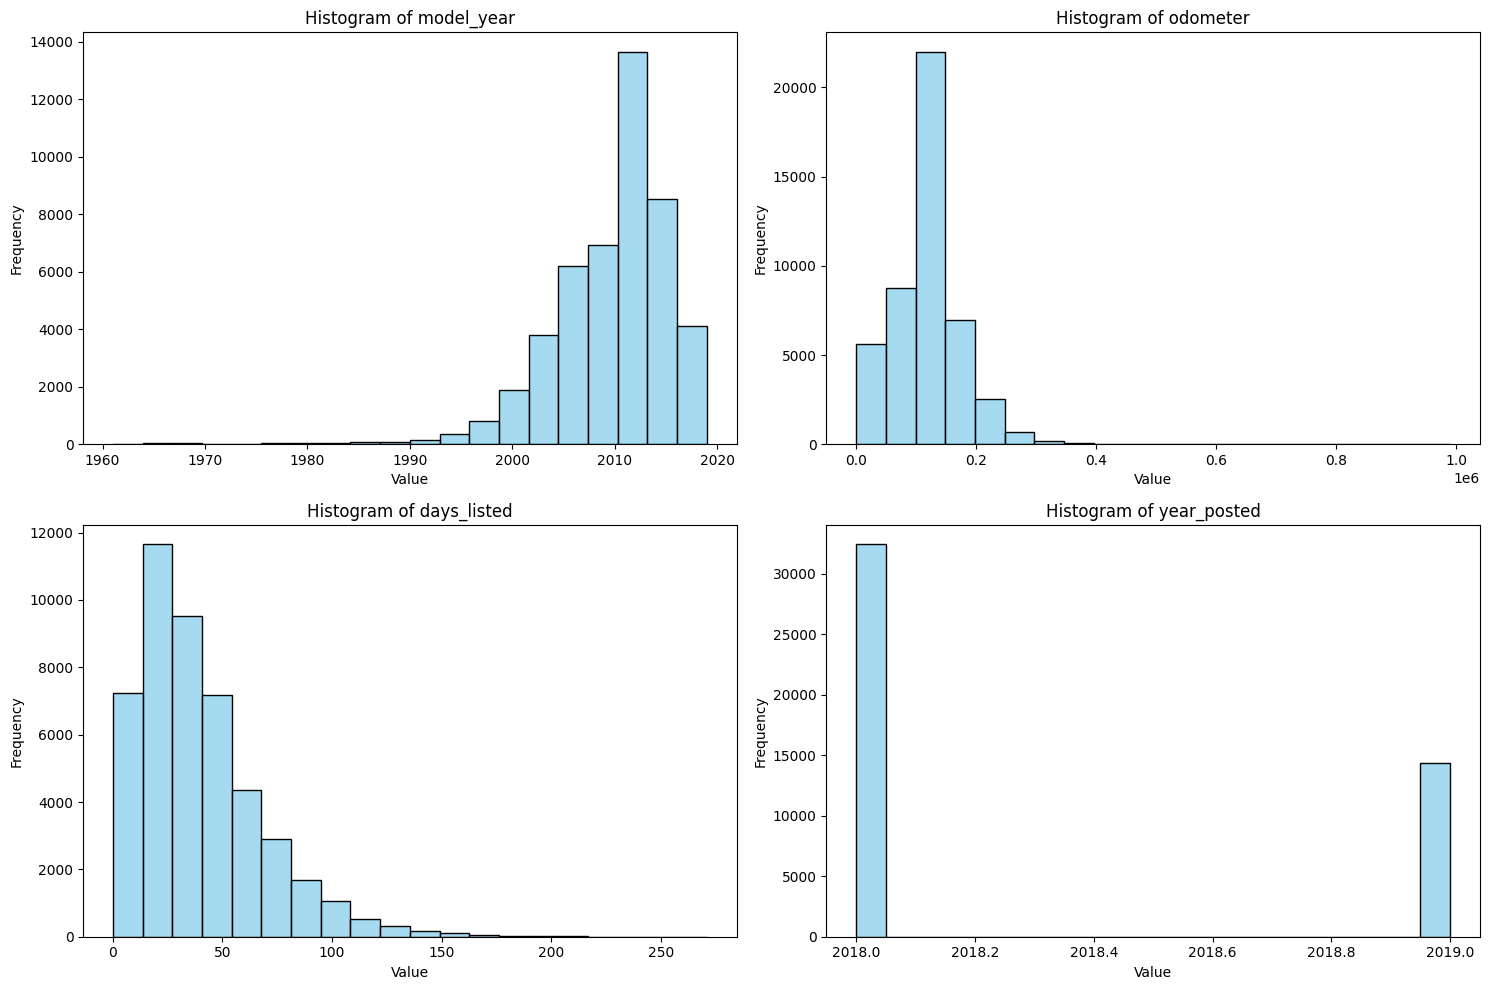

In [36]:
plot_numeric_histograms(df.drop(['price', 'cylinders', 'month_posted'], axis=1))

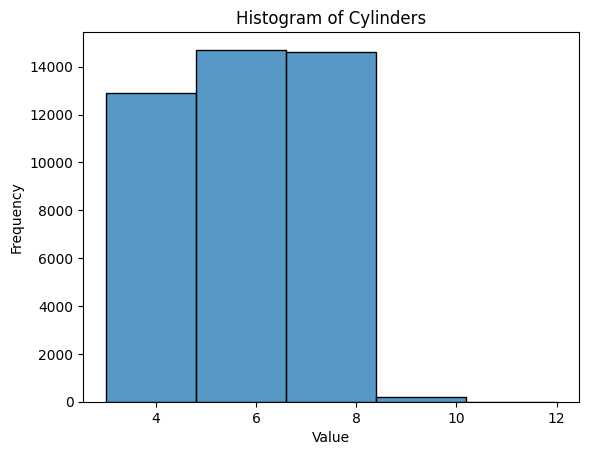

In [37]:
sns.histplot(x='cylinders', data=df, bins=5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Cylinders')
plt.show()

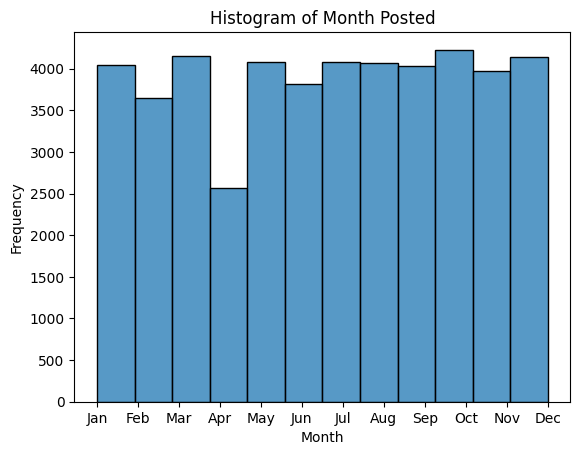

In [38]:
sns.histplot(x='month_posted', data=df, bins=12)
x_label=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1,13), labels=x_label)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title(f'Histogram of Month Posted')
plt.show()

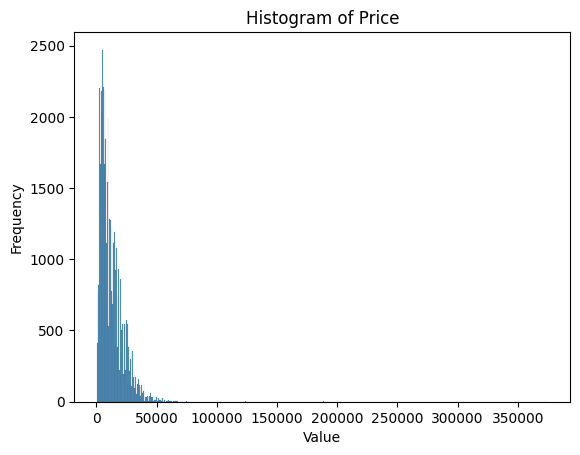

In [39]:
sns.histplot(x='price', data=df)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Price')
plt.show()

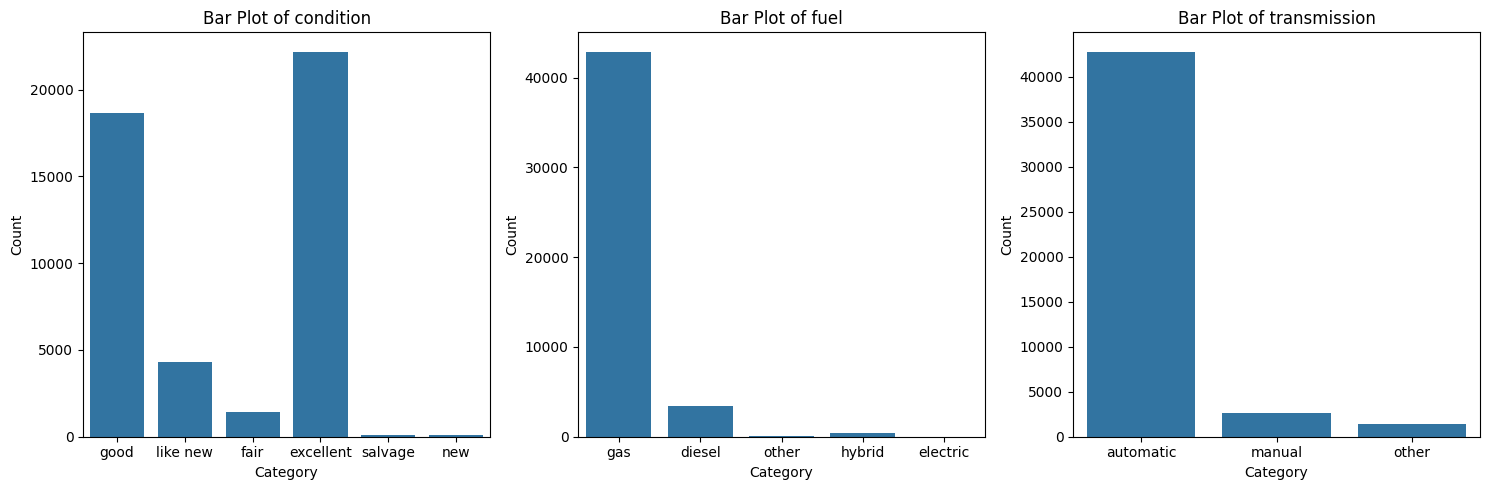

In [40]:
plot_categorical_bars(df.drop(['model', 'type', 'paint_color'], axis=1))

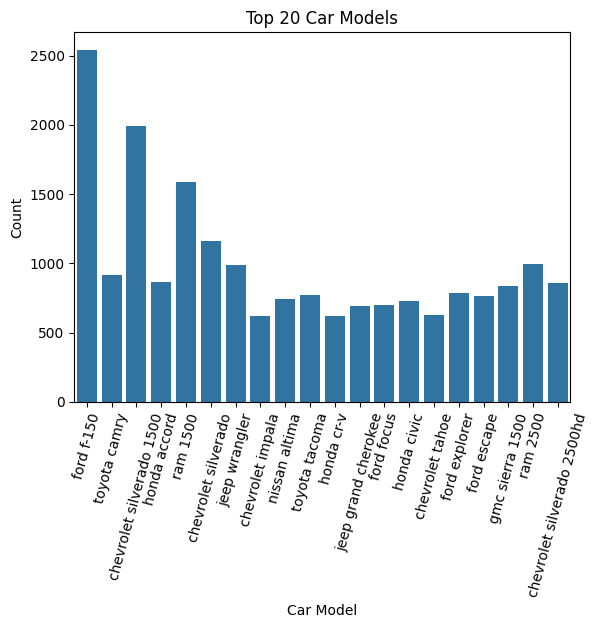

In [41]:
top_models = df['model'].value_counts().head(20).index
df_filtered = df[df['model'].isin(top_models)]
sns.countplot(x='model', data=df_filtered)
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=75)  # Rotate x-axis labels by 45 degrees for better readability
plt.title(f'Top {20} Car Models')
plt.show()

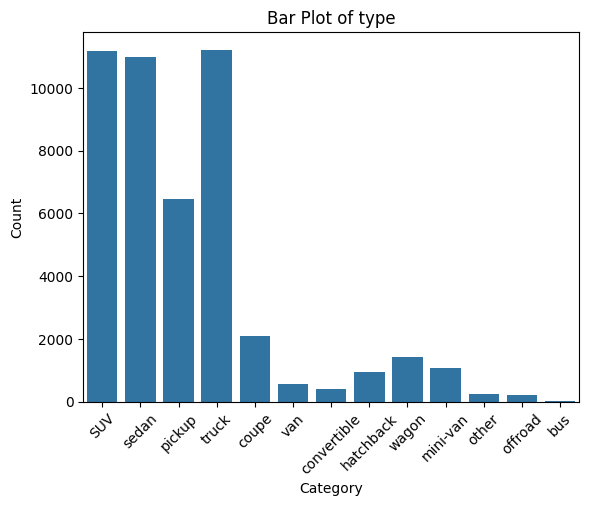

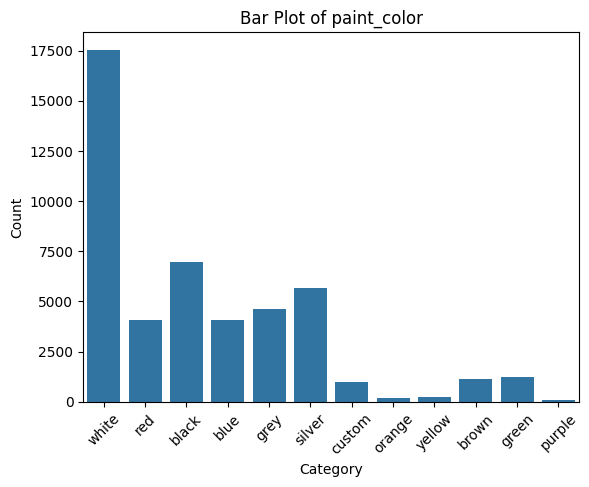

In [42]:
for column in ['type', 'paint_color']:
    sns.countplot(x=column, data=df)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.title(f'Bar Plot of {column}')
    plt.show()